См. файл `ml_7.pdf`

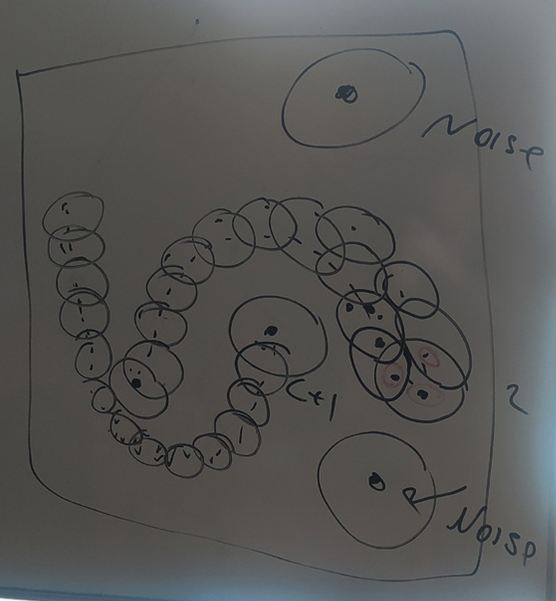

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Создадим набор данных (точек)

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

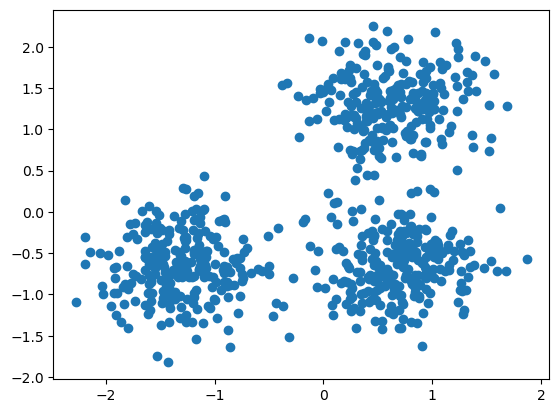

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
# Рекурсивная функция
def points_for_cluster(start):
    # для каждой точки (point):
    for point in np.array(X):
        # Если расстояние от начальной точки (start) до другой точки (point) меньше эпсилон (при этом эта другая точаи (point) ещё не была добавлена в список, находящийся в словаре по ключу clusters[f'cluster_{i}'])
        if (np.sqrt((point[0] - start[0]) ** 2 + (point[1] - start[1]) ** 2) <= epsilon) & (point.tolist() not in clusters[f'cluster_{i}']):
            # то мы добавляем эту точку (point) в список, находящийся в словаре по ключу clusters[f'cluster_{i}']
            clusters[f'cluster_{i}'].append(point.tolist())
            # и удаляем эту точку (point) из данных со всеми точками X
            X.remove(point.tolist())
            # рекурсия (вместо точки start теперь только что добавленная точка point)
            points_for_cluster(point)

In [5]:
X = X.tolist()
epsilon = 0.22
clusters = {} # будем хранить кластеры в словаре
i = 1
while len(X) != 0:
    clusters[f'cluster_{i}'] = []
    start = X[0]
    points_for_cluster(start)
    i += 1

In [6]:
for cluster in clusters.keys():
    clusters[cluster] = np.array(clusters[cluster])

In [7]:
len({cluster: clusters[cluster] for cluster in clusters.keys() if len(clusters[cluster]) > 1})

8

Всего получилось 8 кластеров. Три из них большие, другие маленького размера.

In [8]:
len({cluster: clusters[cluster] for cluster in clusters.keys() if len(clusters[cluster]) == 1})

8

8 точек не вошли ни в один кластер. Это - **шум (Noise)**

In [9]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'pink', 'purple', 'brown', 'gray', 'lime', 'olive', 'maroon', 'navy', 'teal', 'aquamarine', 'turquoise', 'silver', 'gold', 'indigo', 'violet', 'coral', 'salmon', 'sienna', 'khaki', 'peru', 'plum', 'orchid', 'tan', 'crimson', 'lavender', 'wheat', 'azure', 'beige', 'mint', 'cobalt', 'emerald', 'apple', 'eggplant', 'rose', 'peach', 'cherry', 'tangerine', 'apricot', 'flamingo', 'ruby', 'carrot', 'pumpkin', 'sapphire', 'mustard', 'amber', 'turquoise', 'chartreuse', 'rust', 'tomato', 'marigold', 'cranberry', 'lime', 'seafoam', 'mauve', 'steel', 'magnolia', 'saffron', 'sage', 'curry', 'olive', 'tawny', 'honeydew', 'lavender', 'mahogany', 'moss', 'ruby', 'ice', 'electric blue', 'forest green', 'sand', 'cobalt blue', 'beige', 'salmon', 'magenta', 'peach', 'amethyst', 'fuchsia', 'almond', 'jade', 'champagne', 'garnet', 'taupe', 'umber', 'cedar', 'bisque', 'jade']

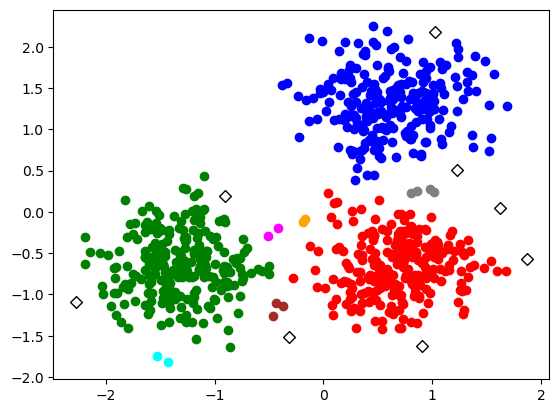

In [10]:
for i, cluster in enumerate(clusters.keys()):
    if len(clusters[cluster]) > 1:
        plt.scatter(clusters[cluster][:,0], clusters[cluster][:,1], c=colors[i])
    else:
        plt.scatter(clusters[cluster][:,0], clusters[cluster][:,1], c='white', marker="D", edgecolor='black')

Каждому кластеру соответствует свой цвет. Выколотыми ромбиками показаны точки Noise.